<a href="https://colab.research.google.com/github/sgogoigh/YouTube-Adviews/blob/main/YouTube_AdViews_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("data.csv")

In [3]:
df.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


In [4]:
df.isnull().sum()

,0
vidid,0
adview,0
views,0
likes,0
dislikes,0
comment,0
published,0
duration,0
category,0


In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.columns

Index(['vidid', 'adview', 'views', 'likes', 'dislikes', 'comment', 'published',
       'duration', 'category'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   vidid      14999 non-null  object
 1   adview     14999 non-null  int64 
 2   views      14999 non-null  object
 3   likes      14999 non-null  object
 4   dislikes   14999 non-null  object
 5   comment    14999 non-null  object
 6   published  14999 non-null  object
 7   duration   14999 non-null  object
 8   category   14999 non-null  object
dtypes: int64(1), object(8)
memory usage: 1.0+ MB


In [8]:
df['adview'] = df['adview'].astype(int)
# df['views'] = df['views'].astype(int)
# df['likes'] = df['likes'].astype(int)
# df['dislikes'] = df['dislikes'].astype(int)
# df['comment'] = df['comment'].astype(int)

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['category'] = le.fit_transform(df['category'])

In [10]:
df['category'].head(10)

,category
0,5
1,3
2,2
3,7
4,3
5,3
6,3
7,4
8,5
9,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   vidid      14999 non-null  object
 1   adview     14999 non-null  int64 
 2   views      14999 non-null  object
 3   likes      14999 non-null  object
 4   dislikes   14999 non-null  object
 5   comment    14999 non-null  object
 6   published  14999 non-null  object
 7   duration   14999 non-null  object
 8   category   14999 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 1.0+ MB


In [12]:
df['likes'].value_counts()

,count
likes,
1,174
0,170
F,155
2,132
3,118
...,...
2636,1
4216,1
5234,1


In [13]:
# there's a stray F that needs to be removed
df = df[df.likes != 'F']
df = df[df.dislikes != 'F']
df = df[df.comment != 'F']
df = df[df.views != 'F']

In [14]:
df['views'] = df['views'].astype(int)
df['likes'] = df['likes'].astype(int)
df['dislikes'] = df['dislikes'].astype(int)
df['comment'] = df['comment'].astype(int)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14637 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   vidid      14637 non-null  object
 1   adview     14637 non-null  int64 
 2   views      14637 non-null  int64 
 3   likes      14637 non-null  int64 
 4   dislikes   14637 non-null  int64 
 5   comment    14637 non-null  int64 
 6   published  14637 non-null  object
 7   duration   14637 non-null  object
 8   category   14637 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 1.1+ MB


In [16]:
df.shape

(14637, 9)

In [17]:
df.describe()

,adview,views,likes,dislikes,comment,category
count,1.463700e+04,1.463700e+04,14637.000000,14637.000000,14637.000000,14637.000000
mean,2.066030e+03,7.112280e+05,2785.841293,254.429391,409.135547,3.607228
std,5.282706e+04,2.731475e+06,8938.490736,1029.774864,1511.176934,1.576312
min,1.000000e+00,4.900000e+01,0.000000,0.000000,0.000000,0.000000
25%,1.000000e+00,3.151700e+04,88.000000,7.000000,7.000000,3.000000
50%,2.000000e+00,1.586680e+05,450.000000,38.000000,46.000000,3.000000
75%,6.000000e+00,5.836130e+05,1863.000000,167.000000,224.000000,5.000000
max,5.429665e+06,1.380479e+08,283824.000000,49449.000000,75045.000000,7.000000


In [18]:
df.drop(columns=['vidid'], axis = 1, inplace = True)

In [19]:
df.head()

,adview,views,likes,dislikes,comment,published,duration,category
0,40,1031602,8523,363,1095,2016-09-14,PT7M37S,5
1,2,1707,56,2,6,2016-10-01,PT9M30S,3
2,1,2023,25,0,2,2016-07-02,PT2M16S,2
3,6,620860,777,161,153,2016-07-27,PT4M22S,7
4,1,666,1,0,0,2016-06-29,PT31S,3


In [20]:
df['published'] = pd.to_datetime(df['published'])

In [21]:
df.head()

,adview,views,likes,dislikes,comment,published,duration,category
0,40,1031602,8523,363,1095,2016-09-14,PT7M37S,5
1,2,1707,56,2,6,2016-10-01,PT9M30S,3
2,1,2023,25,0,2,2016-07-02,PT2M16S,2
3,6,620860,777,161,153,2016-07-27,PT4M22S,7
4,1,666,1,0,0,2016-06-29,PT31S,3


In [22]:
# time to convert durations to something more readable like seconds
df['duration']

,duration
0,PT7M37S
1,PT9M30S
2,PT2M16S
3,PT4M22S
4,PT31S
...,...
14994,PT6M10S
14995,PT3M56S
14996,PT3M13S
14997,PT26S


In [23]:
import re

# it is in ISO 8601 notation
def duration_to_seconds(iso_str):
    match = re.match(r'PT(?:(\d+)M)?(?:(\d+)S)?', iso_str)
    if not match:
        return 0
    minutes = int(match.group(1)) if match.group(1) else 0
    seconds = int(match.group(2)) if match.group(2) else 0
    return minutes * 60 + seconds

df['duration'] = df['duration'].apply(duration_to_seconds)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14637 entries, 0 to 14998
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   adview     14637 non-null  int64         
 1   views      14637 non-null  int64         
 2   likes      14637 non-null  int64         
 3   dislikes   14637 non-null  int64         
 4   comment    14637 non-null  int64         
 5   published  14637 non-null  datetime64[ns]
 6   duration   14637 non-null  int64         
 7   category   14637 non-null  int64         
dtypes: datetime64[ns](1), int64(7)
memory usage: 1.5 MB


In [25]:
# basic pre-processing done
print(df.isnull().sum())
print(df.duplicated().sum())

adview       0
views        0
likes        0
dislikes     0
comment      0
published    0
duration     0
category     0
dtype: int64
0


In [26]:
df.describe()

,adview,views,likes,dislikes,comment,published,duration,category
count,1.463700e+04,1.463700e+04,14637.000000,14637.000000,14637.000000,14637,14637.00000,14637.000000
mean,2.066030e+03,7.112280e+05,2785.841293,254.429391,409.135547,2014-12-12 13:24:09.887271936,493.26679,3.607228
min,1.000000e+00,4.900000e+01,0.000000,0.000000,0.000000,2005-10-24 00:00:00,0.00000,0.000000
25%,1.000000e+00,3.151700e+04,88.000000,7.000000,7.000000,2013-11-14 00:00:00,143.00000,3.000000
50%,2.000000e+00,1.586680e+05,450.000000,38.000000,46.000000,2015-06-04 00:00:00,278.00000,3.000000
75%,6.000000e+00,5.836130e+05,1863.000000,167.000000,224.000000,2016-06-02 00:00:00,589.00000,5.000000
max,5.429665e+06,1.380479e+08,283824.000000,49449.000000,75045.000000,2017-04-23 00:00:00,3590.00000,7.000000
std,5.282706e+04,2.731475e+06,8938.490736,1029.774864,1511.176934,NaN,629.17469,1.576312


In [27]:
# date-time seems to be irrelevant but social media algorithms works according to when someone posts
# converting to something more readable

df['year'] = df['published'].dt.year
df['month'] = df['published'].dt.month
df['day'] = df['published'].dt.day

df = df.drop(columns=['published'], axis = 1)

In [28]:
df.head()

,adview,views,likes,dislikes,comment,duration,category,year,month,day
0,40,1031602,8523,363,1095,457,5,2016,9,14
1,2,1707,56,2,6,570,3,2016,10,1
2,1,2023,25,0,2,136,2,2016,7,2
3,6,620860,777,161,153,262,7,2016,7,27
4,1,666,1,0,0,31,3,2016,6,29


# Data Visualization

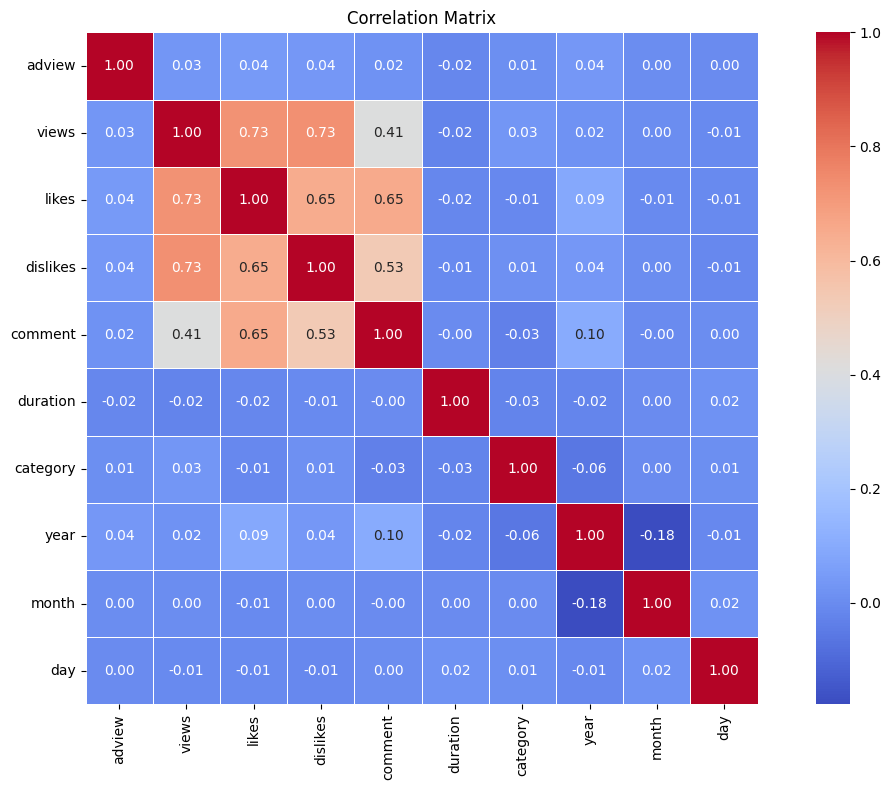

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# correlation matrix
corr = df.corr(numeric_only=True)

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

In [30]:
# we can date, month & year have little relevance

df = df.drop(columns=['day', 'month', 'year'], axis = 1)
df.head()

,adview,views,likes,dislikes,comment,duration,category
0,40,1031602,8523,363,1095,457,5
1,2,1707,56,2,6,570,3
2,1,2023,25,0,2,136,2
3,6,620860,777,161,153,262,7
4,1,666,1,0,0,31,3


<ipython-input-31-1848868581>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  plot_data = df.groupby('binned')['adview'].mean().reset_index()


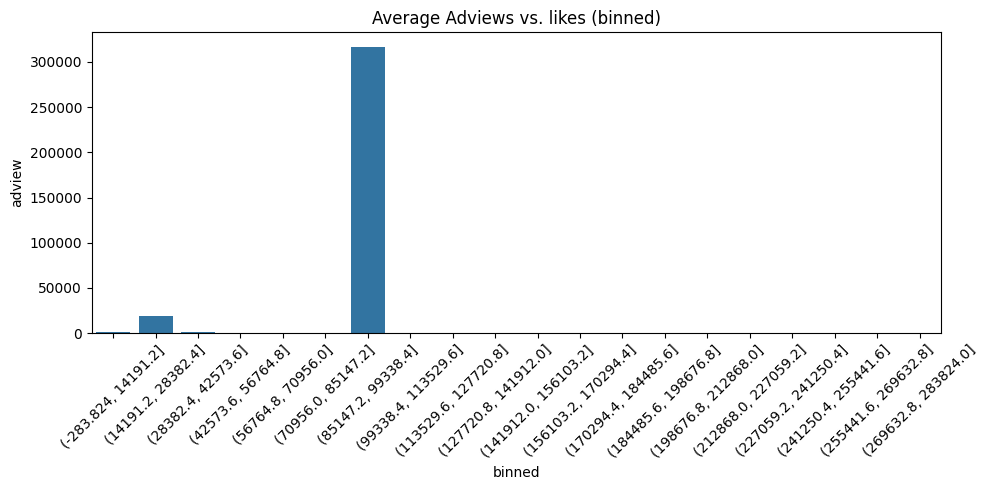

<ipython-input-31-1848868581>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  plot_data = df.groupby('binned')['adview'].mean().reset_index()


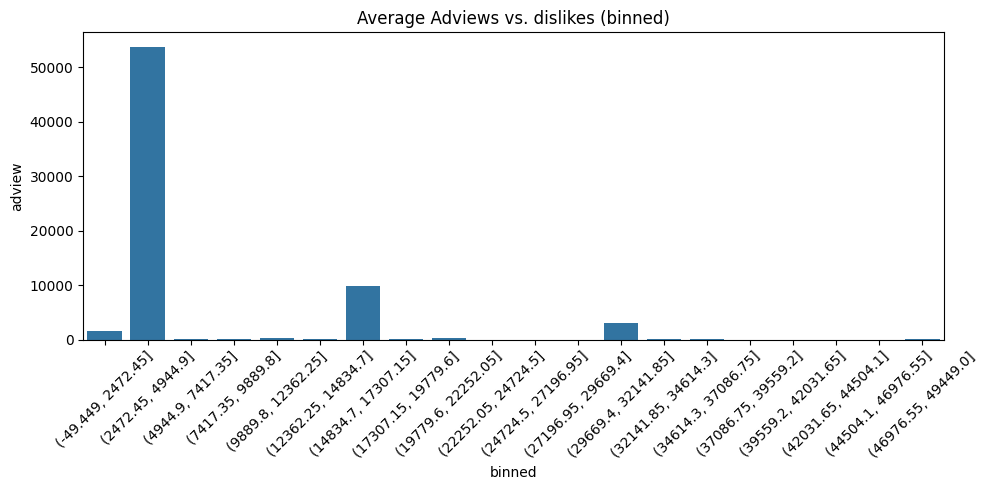

<ipython-input-31-1848868581>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  plot_data = df.groupby('binned')['adview'].mean().reset_index()


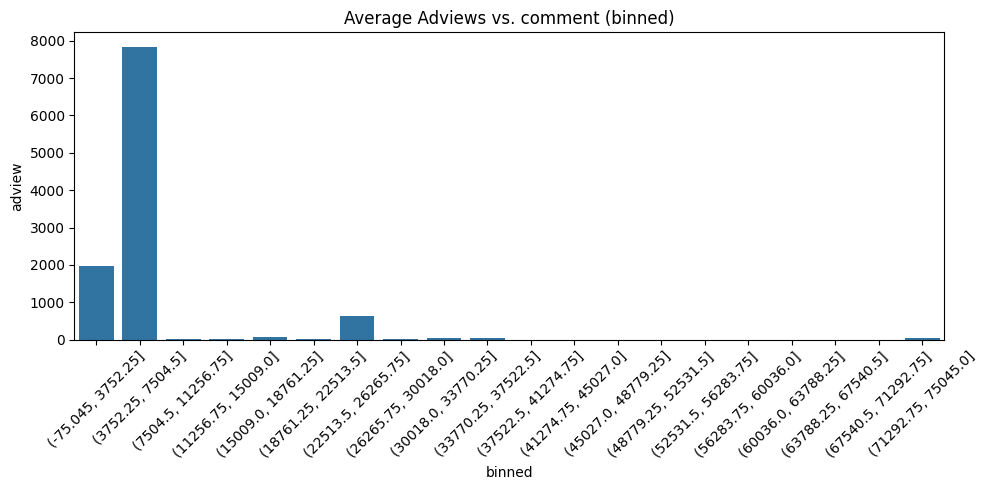

<ipython-input-31-1848868581>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  plot_data = df.groupby('binned')['adview'].mean().reset_index()


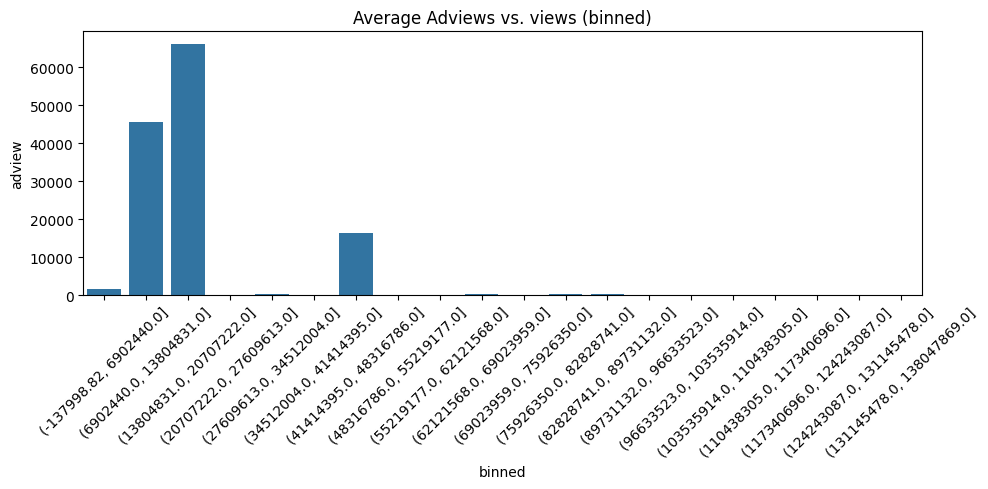

<ipython-input-31-1848868581>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  plot_data = df.groupby('binned')['adview'].mean().reset_index()


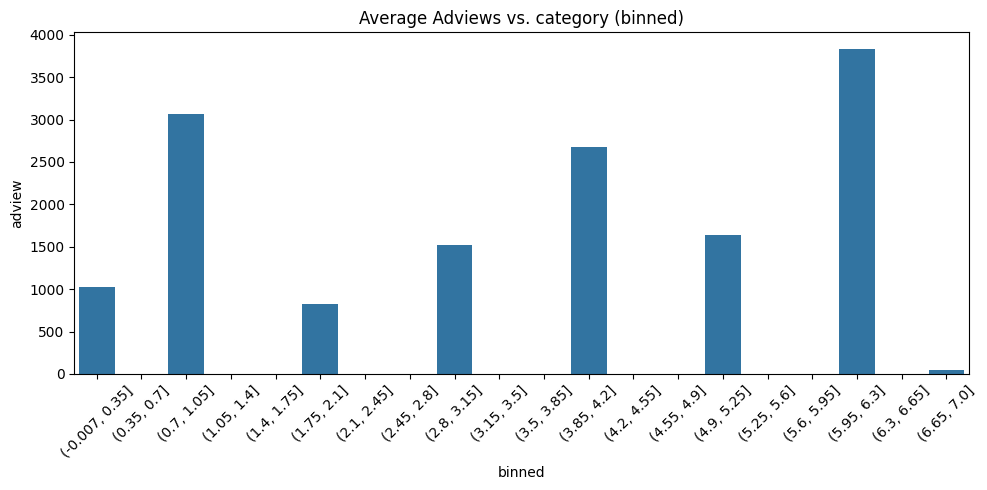

In [31]:
# generating histograms for adviews
columns = ['likes', 'dislikes', 'comment', 'views', 'category']

for col in columns:
    plt.figure(figsize=(10, 5))

    df['binned'] = pd.cut(df[col], bins=20)
    plot_data = df.groupby('binned')['adview'].mean().reset_index()
    sns.barplot(x='binned', y='adview', data=plot_data)
    plt.xticks(rotation=45)
    plt.title(f'Average Adviews vs. {col} (binned)')
    plt.tight_layout()
    plt.show()

Training & Testing

In [32]:
df = df.drop(columns=['binned'], axis = 1)

X = df.drop(columns=['adview'], axis = 1)
Y = df['adview']

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(X.shape, X_train.shape, X_test.shape)

(14637, 6) (11709, 6) (2928, 6)


In [34]:
X_train.head()

,views,likes,dislikes,comment,duration,category
12545,26171,12,2,5,2920,6
7923,34417,143,2,44,618,3
3012,26086,19,0,9,178,5
1888,305445,3662,45,555,257,6
5279,120739,766,16,227,295,6


In [35]:
Y_train.head()

,adview
12545,1
7923,3
3012,18782
1888,2
5279,1


## Linear Regression

In [36]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)

LinearRegression()

In [37]:
Y_pred = lin_reg.predict(X_test)

In [38]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)

print(mse, rmse, r2, mae)

10879097805.918941 104302.91369812706 0.0009290511907500409 5125.436158456649


In [39]:
# hyper parameter tuning
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

params = {
    'alpha': [50.0, 60.0, 10.0, 100.0, 200.0, 150.0, 250.0, 300.0, 350.0],  # Regularization strength
    'fit_intercept': [True, False]
}

ridge = Ridge()
grid = GridSearchCV(ridge, params, scoring='neg_mean_squared_error', cv=5)
grid.fit(X_train, Y_train)

print("Best parameters:", grid.best_params_)
print("Best RMSE:", (-grid.best_score_)**0.5)

Best parameters: {'alpha': 350.0, 'fit_intercept': True}
Best RMSE: 27718.047659063912


## SVM Regressor

In [43]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svr = SVR()
param_grid = {
    'kernel': ['rbf', 'linear', 'poly'],
    'C': [0.1, 1, 10],
    'epsilon': [0.1, 0.2, 0.5]
}

grid_search = GridSearchCV(svr, param_grid, scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train_scaled, Y_train)

best_svr = grid_search.best_estimator_

Y_pred = best_svr.predict(X_test_scaled)

mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)

print(mse, rmse)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


KeyboardInterrupt: 

## Decision Tree Regressor

In [41]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=42)

param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_dt = GridSearchCV(dt, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
grid_search_dt.fit(X_train, Y_train)

best_dt = grid_search_dt.best_estimator_
Y_pred_dt = best_dt.predict(X_test)

mse_dt = mean_squared_error(Y_test, Y_pred_dt)
rmse_dt = np.sqrt(mse_dt)

print(mse_dt, rmse_dt)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
10963629797.514168 104707.35312056249


## Random Forest Regressor

In [42]:
from sklearn.ensemble import RandomForestRegressor


rf = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search_rf = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
grid_search_rf.fit(X_train, Y_train)

best_rf = grid_search_rf.best_estimator_
Y_pred_rf = best_rf.predict(X_test)

mse_rf = mean_squared_error(Y_test, Y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

print(mse_dt, rmse_dt)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
10963629797.514168 104707.35312056249


## Using Artificial Neural Networks

In [48]:
X_scaler = StandardScaler()
Y_scaler = StandardScaler()

X_train_scaled = X_scaler.fit_transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

Y_train_scaled = Y_scaler.fit_transform(Y_train.values.reshape(-1, 1))
Y_test_scaled = Y_scaler.transform(Y_test.values.reshape(-1, 1))

In [49]:
# train a sequential neural network to predict adviews
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = model.fit(X_train_scaled, Y_train_scaled, validation_split=0.1, epochs=50, batch_size=32)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


330/330 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.7443 - mae: 0.1295 - val_loss: 0.2015 - val_mae: 0.0851
Epoch 2/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1188 - mae: 0.1293 - val_loss: 0.2024 - val_mae: 0.0848
Epoch 3/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.6350 - mae: 0.1288 - val_loss: 0.1993 - val_mae: 0.0710
Epoch 4/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.6336 - mae: 0.1036 - val_loss: 0.2083 - val_mae: 0.0885
Epoch 5/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.5791 - mae: 0.1145 - val_loss: 0.2013 - val_mae: 0.0897
Epoch 6/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.6025 - mae: 0.1148 - val_loss: 0.2033 - val_mae: 0.0816
Epoch 7/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 1.1371 - mae: 0.1279 - val_loss: 0.2030 - val_mae: 0.1087
Epoch 8/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0620 - mae: 0.1348 - val_loss: 0.2021 - val_mae: 0.0800
Epoch 9/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.8977 

In [50]:
loss, mae = model.evaluate(X_test_scaled, Y_test_scaled)

Y_pred_scaled = model.predict(X_test_scaled)
Y_pred = Y_scaler.inverse_transform(Y_pred_scaled).flatten()
Y_test_orig = Y_scaler.inverse_transform(Y_test_scaled)

mse = mean_squared_error(Y_test_orig, Y_pred)
rmse = np.sqrt(mse)

print(mae, mse, rmse)

92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.3749 - mae: 0.0971
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
0.15862368047237396 10873063706.210253 104273.98384165752
